<a class="anchor" id="0"></a>
# **Decision Tree Classifier Tutorial with Python**


Hello friends,

In this kernel, I build a Decision Tree Classifier to predict the safety of the car. I build two models, one with criterion `gini index` and another one with criterion `entropy`. I implement Decision Tree Classification with Python and Scikit-Learn. 

**As always, I hope you find this kernel useful and your <font color="red"><b>UPVOTES</b></font> would be highly appreciated**.

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Decision Tree algorithm](#1)
2.	[Classification and Regression Trees](#2)
3.	[Decision Tree algorithm terminology](#3)
4.	[Decision Tree algorithm intuition](#4)
5.	[Attribute selection measures](#5)
    - 5.1 [Information gain](#5.1)
    - 5.2 [Gini index](#5.2)
6.	[Overfitting in Decision-Tree algorithm](#6)
7.	[Import libraries](#7)
8.	[Import dataset](#8)
9.	[Exploratory data analysis](#9)
10.	[Declare feature vector and target variable](#10)
11.	[Split data into separate training and test set](#11)
12.	[Feature engineering](#12)
13.	[Decision Tree classifier with criterion gini-index](#13)
14.	[Decision Tree classifier with criterion entropy](#14)
15.	[Confusion matrix](#15)
16.	[Classification report](#16)
17.	[Results and conclusion](#17)
18. [References](#18)


In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [10]:
import warnings

warnings.filterwarnings('ignore')

# Import dataset** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [12]:
data = '/Users/pere amat/CE/SAA/DECISION_TREES/car_evaluation.csv'

df = pd.read_csv(data, header=None)

# *Exploratory data analysis** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data. 

In [8]:
# view dimensions of dataset

df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [5]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [26]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

#La línea de código df.columns = col_names en Python sirve para asignar un nuevo conjunto de nombres de columna a un DataFrame de pandas llamado df.

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [13]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [28]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   
#Muestra el número de veces que aparece cada valor en cada columna de df listada en col_names. Es útil para explorar datos categóricos y ver cuántas instancias de cada valor hay en cada columna.

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [17]:
df['class'].value_counts()

#El código df['class'].value_counts() devuelve una serie que muestra el recuento de valores únicos en la columna 'class' del DataFrame df. Es decir, cuenta cuántas veces aparece cada valor distinto en esa columna.

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [11]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# ** DECISION TREE** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

# **1. LIBRERIAS** <a class="little" id="3"></a>

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# **2. definir variable objetivo y variables para el processo* <a class="little" id="3"></a>

In [122]:
X = df.drop(['class'], axis=1)

y = df['class']

# **3. Dividir los datos en conjunto de prueba y entrenamiento* <a class="little" id="3"></a>

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# **4. Dimensiones y codificación variables* <a class="little" id="3"></a>

In [126]:
# Para verificar las dimensiones de train

X_train.shape, X_test.shape

((1157, 6), (571, 6))

ara modelos de machine learning, incluidas técnicas como árboles de decisión, las variables independientes (X_train y X_test) deben estar en formato bidimensional,

In [102]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [43]:
!pip install category_encoders


  Using cached category_encoders-2.6.4-py2.py3-none-any.whl.metadata (8.0 kB)
Using cached category_encoders-2.6.4-py2.py3-none-any.whl (82 kB)


In [104]:
# import category encoders

import category_encoders as ce


In [128]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

Este código utiliza la biblioteca category_encoders para realizar una codificación ordinal de las variables categóricas en los conjuntos de datos X_train y X_test. 

# **5. DEFINO MOPDELO Y PARAMETROS** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [130]:
# instantiate the DecisionTreeClassifier model with criterion gini index

DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# **6 TRAIN MODELO. ** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [132]:
# fit the model
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

# **7 PREDICCIONES CONJUNTO TEST. ** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [134]:
y_pred  = DecisionTree.predict(X_test)


# **8 METRICAS. ** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# **accuracy. ** <a class="anchor" id="13"></a>

In [184]:
test_accuracy = accuracy_score(y_test, y_pred)
print(test_accuracy)

0.8021015761821366


Como podemos observar el modelo tiene un 80% de efectividad,

# **Matriu confusion. ** <a class="anchor" id="13"></a>

In [158]:
matriu_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", matriu_confusion)

Matriz de Confusión:
 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


# **9 VERIFICACIÓN overfiting o underfiting. ** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [186]:
y_test_pred =DecisionTree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.7865168539325843
0.8021015761821366


Aquí, la puntuación de precisión del conjunto de entrenamiento es 0,7865, mientras que la precisión del conjunto de prueba es 0,8021. Estos dos valores son bastante comparables. Por tanto, no hay signos de sobreajuste.


### Visualize decision-trees

[Text(0.4, 0.875, 'x[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'x[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'x[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255.0, 49.0, 181.0, 40.0]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

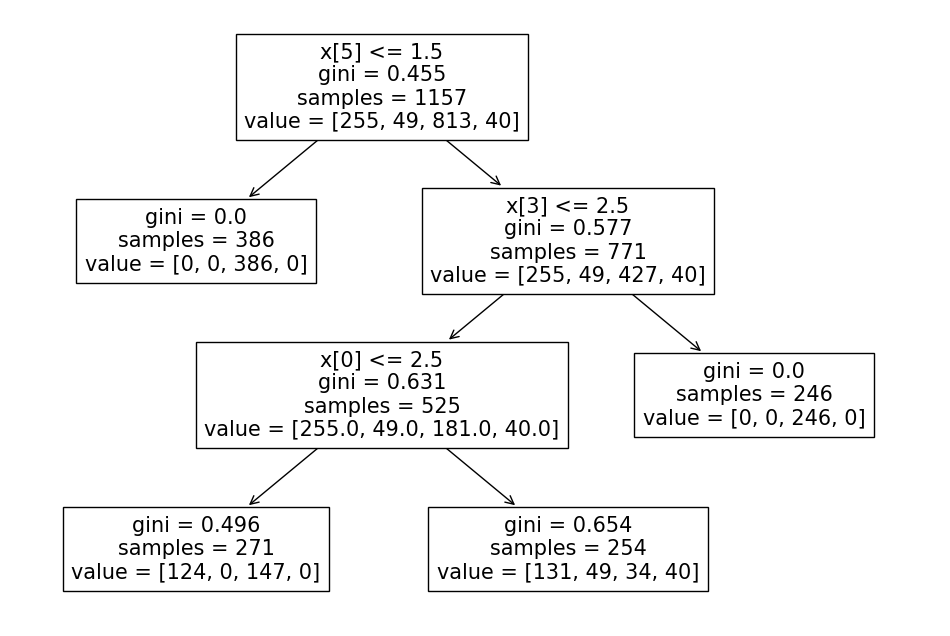

In [193]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(DecisionTree.fit(X_train, y_train)) 

# **10. Decision Tree Classifier con criterio diferente entropy** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [203]:
# instantiate the DecisionTreeClassifier model with criterion entropy

DecisionTree2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
DecisionTree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [207]:
y_pred_en = DecisionTree2.predict(X_test)

In [213]:
test2_accuracy = accuracy_score(y_test, y_pred_en)
print(test2_accuracy)

0.8021015761821366


### Check accuracy score with criterion entropy

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [33]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [34]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7865


### Check for overfitting and underfitting

In [35]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


### Visualize decision-trees

[Text(267.84000000000003, 380.52, 'X[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(133.92000000000002, 271.8, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(401.76000000000005, 271.8, 'X[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(267.84000000000003, 163.07999999999998, 'X[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(133.92000000000002, 54.360000000000014, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(401.76000000000005, 54.360000000000014, 'entropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(535.6800000000001, 163.07999999999998, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

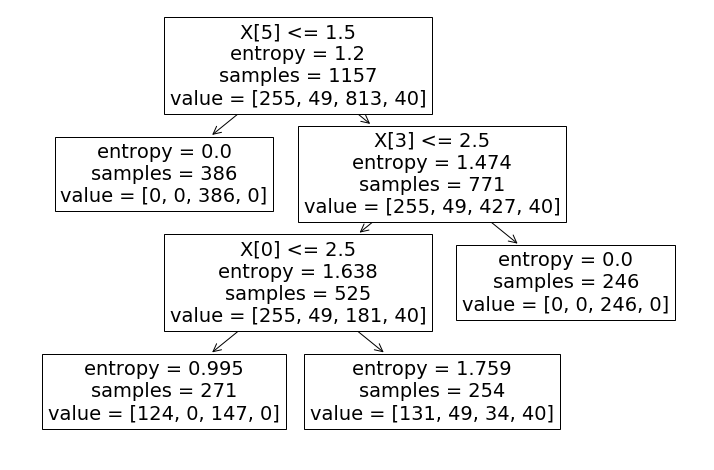

In [36]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

### Visualize decision-trees with graphviz

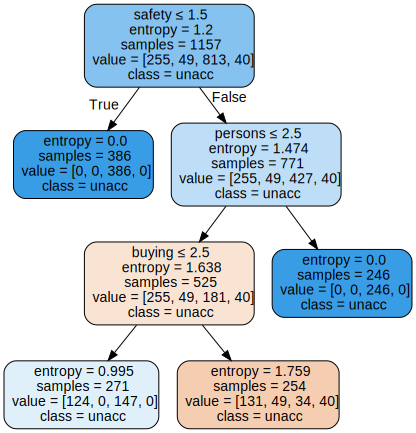

In [37]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

# **15. Confusion matrix** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [38]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


# **16. Classification Report** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



# **17. Results and conclusion** <a class="anchor" id="17"></a>

[Table of Contents](#0.1)


1.	In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion `gini index` and another one with criterion `entropy`. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8021.
2.	In the model with criterion `gini index`, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.
3.	Similarly, in the model with criterion `entropy`, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.We get the same values as in the case with criterion `gini`. So, there is no sign of overfitting.
4.	In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
5.	The confusion matrix and classification report yields very good model performance.

So, now we will come to the end of this kernel.

I hope you find this kernel useful and enjoyable.
	
Your comments and feedback are most welcome.

Thank you


[Go to Top](#0)